In [25]:
from datetime import datetime
import backtrader as bt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import matplotlib

In [31]:
%matplotlib inline

In [132]:
# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=5,  # period for the fast moving average
        pslow=200   # period for the slow moving average
    )

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
        
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                # self.log('OPEN CREATE, %.2f' % self.dataclose[0])
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            # self.log('CLOSE CREATE, %.2f' % self.dataclose[0])
            self.close()  # close long position
            
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None
            
            

In [133]:
cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(28)

# Create a data feed
#data = bt.feeds.YahooFinanceData(dataname='MSFT',
#                                 fromdate=datetime(2011, 1, 1),
#                                 todate=datetime(2012, 12, 31))

data = bt.feeds.YahooFinanceCSVData(
    dataname='PWF-PT.TO.csv',
    adjclose=False,
    fromdate=datetime(2014, 1, 1),
    todate=datetime(2021, 7, 25))
    #settings for out-of-sample data
    #fromdate=datetime.datetime(2018, 1, 1),
    #todate=datetime.datetime(2019, 12, 25))

cerebro.adddata(data)  # Add the data feed
cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all

2014-11-06, BUY EXECUTED, 25.90
2014-12-08, SELL EXECUTED, 25.81
2014-12-29, BUY EXECUTED, 26.27
2015-01-21, SELL EXECUTED, 25.96
2015-01-22, BUY EXECUTED, 26.04
2015-02-02, SELL EXECUTED, 24.50
2016-05-31, BUY EXECUTED, 21.62
2016-06-17, SELL EXECUTED, 20.33
2016-08-10, BUY EXECUTED, 21.06
2016-09-06, SELL EXECUTED, 20.55
2016-12-22, BUY EXECUTED, 20.61
2018-03-29, SELL EXECUTED, 23.78
2018-04-06, BUY EXECUTED, 24.00
2018-04-10, SELL EXECUTED, 23.88
2018-04-17, BUY EXECUTED, 24.16
2018-04-24, SELL EXECUTED, 23.69
2018-05-14, BUY EXECUTED, 24.22
2018-06-22, SELL EXECUTED, 24.16
2018-08-27, BUY EXECUTED, 24.42
2018-09-17, SELL EXECUTED, 24.42
2018-10-03, BUY EXECUTED, 24.64
2018-10-12, SELL EXECUTED, 24.32
2019-12-30, BUY EXECUTED, 18.41
2020-03-02, SELL EXECUTED, 17.74
2020-07-23, BUY EXECUTED, 16.25


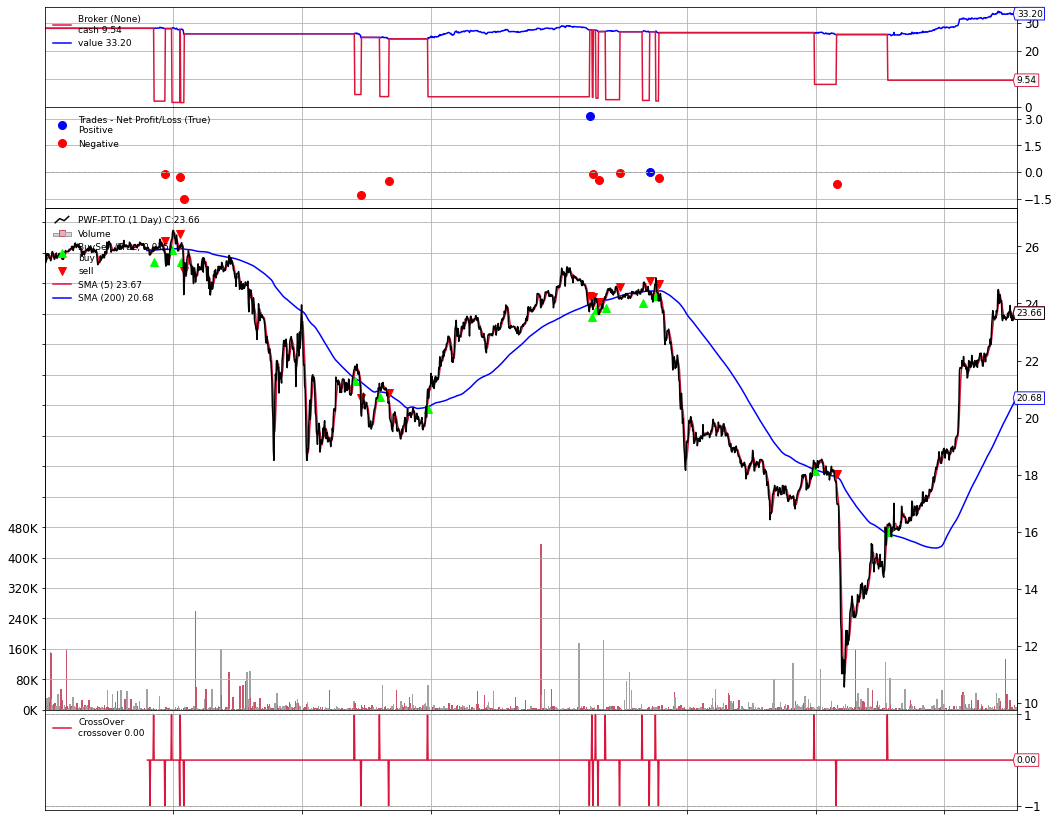

[[<Figure size 1080x864 with 5 Axes>]]

In [134]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12}) 

cerebro.plot(iplot=False)  # and plot it with a single command

In [5]:
# Create a data feed
data = bt.feeds.YahooFinanceData(dataname='MSFT',
                                 fromdate=datetime(2011, 1, 1),
                                 todate=datetime(2012, 12, 31))

In [17]:
foo

[[<Figure size 640x480 with 5 Axes>], [<Figure size 640x480 with 5 Axes>]]

AttributeError: 'list' object has no attribute 'show'